In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from statistics import mean

In [ ]:
# X_train = pd.read_csv("/content/drive/MyDrive/CSULB Assignments/CECS 551 ADV AI/Assignment 5/mnist/train-images-idx3-ubyte")

In [ ]:
from keras.datasets import mnist

In [ ]:
# from mnist import MNIST
import os
import numpy as np

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
np.shape(train_X)

(60000, 28, 28)

In [ ]:
np.shape(test_X)

(10000, 28, 28)

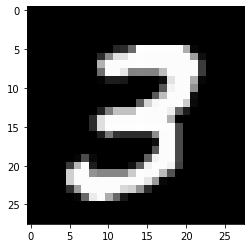

3


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

id = 7

image = np.array(train_X[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(train_y[id])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

In [ ]:
#unique train labels
unique, counts = np.unique(train_y, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

#unique test labels
unique, counts = np.unique(test_y, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
n_labels = len(np.unique(train_y))
n_labels

10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [ ]:
#one-hot vector
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
img_size = train_X.shape[1]
input_size = img_size * img_size
input_size

784

In [ ]:
train_X = np.reshape(train_X, [-1, input_size])
train_X = train_X.astype('float32') / 255
test_X = np.reshape(test_X, [-1, input_size])
test_X = test_X.astype('float32') / 255

In [ ]:
np.shape(test_X)

(10000, 784)

In [ ]:
from sklearn.model_selection import train_test_split

x_subtrain1, x_valid1, y_subtrain1, y_valid1 = train_test_split(train_X, train_y, test_size=0.16, random_state=1)
x_subtrain2, x_valid2, y_subtrain2, y_valid2 = train_test_split(train_X, train_y, test_size=0.16, random_state=2)
x_subtrain3, x_valid3, y_subtrain3, y_valid3 = train_test_split(train_X, train_y, test_size=0.16, random_state=3)
x_subtrain4, x_valid4, y_subtrain4, y_valid4 = train_test_split(train_X, train_y, test_size=0.16, random_state=4)
x_subtrain5, x_valid5, y_subtrain5, y_valid5 = train_test_split(train_X, train_y, test_size=0.16, random_state=5)
x_subtrain6, x_valid6, y_subtrain6, y_valid6 = train_test_split(train_X, train_y, test_size=0.16, random_state=6)
x_subtrain7, x_valid7, y_subtrain7, y_valid7 = train_test_split(train_X, train_y, test_size=0.16, random_state=7)
x_subtrain8, x_valid8, y_subtrain8, y_valid8 = train_test_split(train_X, train_y, test_size=0.16, random_state=8)
x_subtrain9, x_valid9, y_subtrain9, y_valid9 = train_test_split(train_X, train_y, test_size=0.16, random_state=9)
x_subtrain10, x_valid10, y_subtrain10, y_valid10 = train_test_split(train_X, train_y, test_size=0.16, random_state=10)

#Adam Optimizer

In [ ]:
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.keras.optimizers.Adam(learning_rate=0.03, beta_1=0.8, beta_2=0.8, epsilon=1e-08, amsgrad=False, name="Adam")

model = Sequential()
model.add(Dense(32, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(n_labels))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_subtrain10, y_subtrain10, epochs=60, batch_size=64)

Epoch 1/60
788/788 [==============================] - 4s 4ms/step - loss: 0.7264 - accuracy: 0.7761
Epoch 2/60
788/788 [==============================] - 3s 4ms/step - loss: 0.4461 - accuracy: 0.8655
Epoch 3/60
788/788 [==============================] - 3s 4ms/step - loss: 0.3941 - accuracy: 0.8803
Epoch 4/60
788/788 [==============================] - 2s 3ms/step - loss: 0.3655 - accuracy: 0.8899
Epoch 5/60
788/788 [==============================] - 2s 3ms/step - loss: 0.3425 - accuracy: 0.8942
Epoch 6/60
788/788 [==============================] - 2s 3ms/step - loss: 0.3326 - accuracy: 0.8971
Epoch 7/60
788/788 [==============================] - 2s 3ms/step - loss: 0.3224 - accuracy: 0.8998
Epoch 8/60
788/788 [==============================] - 2s 3ms/step - loss: 0.3183 - accuracy: 0.9007
Epoch 9/60
788/788 [==============================] - 2s 3ms/step - loss: 0.3089 - accuracy: 0.9040
Epoch 10/60
788/788 [==============================] - 2s 3ms/step - loss: 0.3029 - accuracy: 0.9052

In [ ]:
train_acc = hist.history['accuracy']

In [ ]:
avg_train = mean(train_acc)
print(avg_train*100)

91.3576062520345


#Evaluation on Validation Set

In [ ]:
_, accuracy = model.evaluate(x_valid10, y_valid10)
print('Accuracy: %.2f' % (accuracy*100))

300/300 [==============================] - 1s 2ms/step - loss: 0.1628 - accuracy: 0.9583
Accuracy: 95.83


#Training with best Hyper-parameters -  (0.003, 0.9, 0.999,1e-08)

In [ ]:
tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name="Adam")

model = Sequential()
model.add(Dense(32, input_dim=input_size))
model.add(Activation('softmax'))
model.add(Dropout(0.3))

model.add(Dense(n_labels))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_y, epochs=60, batch_size=64)

Epoch 1/60
938/938 [==============================] - 4s 3ms/step - loss: 1.7223 - accuracy: 0.4690
Epoch 2/60
938/938 [==============================] - 3s 3ms/step - loss: 1.3054 - accuracy: 0.5460
Epoch 3/60
938/938 [==============================] - 3s 3ms/step - loss: 1.1895 - accuracy: 0.5728
Epoch 4/60
938/938 [==============================] - 3s 3ms/step - loss: 1.0687 - accuracy: 0.6226
Epoch 5/60
938/938 [==============================] - 3s 3ms/step - loss: 1.0360 - accuracy: 0.6285
Epoch 6/60
938/938 [==============================] - 3s 3ms/step - loss: 0.9828 - accuracy: 0.6661
Epoch 7/60
938/938 [==============================] - 3s 3ms/step - loss: 0.9289 - accuracy: 0.6957
Epoch 8/60
938/938 [==============================] - 3s 3ms/step - loss: 0.8803 - accuracy: 0.7099
Epoch 9/60
938/938 [==============================] - 3s 3ms/step - loss: 0.8479 - accuracy: 0.7165
Epoch 10/60
938/938 [==============================] - 3s 3ms/step - loss: 0.8255 - accuracy: 0.7198

In [ ]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2067 - accuracy: 0.9451


[0.2066574990749359, 0.9451000094413757]

#Evaluation on Test Set

In [ ]:
_, accuracy = model.evaluate(test_X, test_y)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2122 - accuracy: 0.9443
Accuracy: 94.43
